In [25]:
import pickle
import numpy as np
import os
import torch
import torch.nn as nn
import re
import sys
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)

from sr_model.models.models import AnalyticSR, STDP_SR
from datasets import inputs
import configs

device = 'cpu'

In [27]:
with open(f'{configs.engram_dir}02_gamma_v_rstep/results.p', 'rb') as f:
    results = pickle.load(f)

In [28]:
for key in results.keys():
    results[key] = np.array(results[key])

In [29]:
results.keys()

dict_keys(['gammas', 'rsteps', 'vals'])

In [38]:
gammas = results['gammas']
rsteps = results['rsteps']
vals = results['vals']

In [39]:
xs = np.sort(np.unique(gammas))
ys = np.sort(np.unique(rsteps))

## Plot test loss for different gammas and recurrent steps

In [48]:
import matplotlib as mpl

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_3240/1827548256.py:9: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  pcm = plt.imshow(mat, cmap="Blues_r", vmax=10, norm=mpl.colors.LogNorm(), aspect='auto')


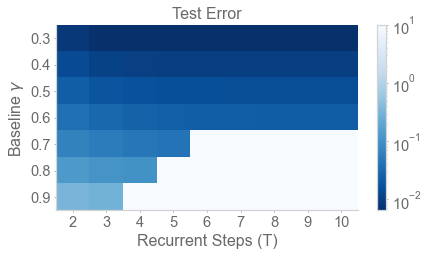

In [85]:
mat = np.zeros((xs.size, ys.size))*np.nan
for x_idx, x in enumerate(xs):
    for y_idx, y in enumerate(ys):
        idxs = np.logical_and(gammas==x, rsteps==y)
        val = vals[idxs]
        mat[x_idx][y_idx] = np.mean(val)

plt.figure(figsize=(6.4, 4.8*0.8))
pcm = plt.imshow(mat, cmap="Blues_r", vmax=10, norm=mpl.colors.LogNorm(), aspect='auto')
#pcm = plt.pcolor(mat.T, norm=mpl.colors.LogNorm(), cmap='Blues_r')
plt.colorbar(pcm)
plt.xticks(np.arange(ys.size), ys)
plt.yticks(np.arange(len(xs)), xs)
plt.xlabel('Recurrent Steps (T)')
plt.ylabel('Baseline $\gamma$')
plt.title("Test Error")
plt.tight_layout()
plt.savefig(f"gamma_v_rsteps_{nonlinearity}.png", dpi=300)
plt.show()